In [1]:
from IPython.display import HTML
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mp
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes"
response = requests.get(url)
HTML(response.text)
soup = BeautifulSoup(response.text, 'html5lib')

In [4]:
overView = soup.find_all('table', {'class': 'wikitable plainrowheaders'})
overViewData = overView[0].find_all('tr')
overViewData

[<tr style="text-align:center"><th colspan="2" rowspan="2" scope="col" style="min-width:50px;padding:0 8px">Season</th><th colspan="2" rowspan="2" scope="col" style="padding:0 8px">Episodes</th><th colspan="2" scope="col">Originally aired</th><th rowspan="2" scope="col" style="padding:0 8px"><abbr title="Average">Avg.</abbr> U.S. viewers<br/>(millions)</th></tr>,
 <tr><th scope="col">First aired</th><th scope="col">Last aired</th></tr>,
 <tr><td style="background:#295354;width:10px"></td><th colspan="1" scope="row" style="text-align:center"><a href="#Season_1_(2011)">1</a></th><td colspan="2">10</td><td colspan="1" style="padding:0.2em 0.4em">April 17, 2011<span style="display:none"> (<span class="bday dtstart published updated">2011-04-17</span>)</span></td><td style="padding:0 8px">June 19, 2011<span style="display:none"> (<span class="dtend">2011-06-19</span>)</span></td><td>2.52<sup class="reference" id="cite_ref-average_2_13-0"><a href="#cite_note-average_2-13">[13]</a></sup></td>

In [5]:
tableOneData = list()
for over in overViewData:
    tableOneData.append([x.getText() for x in over.find_all('td')])
tableOneData

[[],
 [],
 ['',
  '10',
  'April\xa017,\xa02011\xa0(2011-04-17)',
  'June\xa019,\xa02011\xa0(2011-06-19)',
  '2.52[13]'],
 ['',
  '10',
  'April\xa01,\xa02012\xa0(2012-04-01)',
  'June\xa03,\xa02012\xa0(2012-06-03)',
  '3.80[13]'],
 ['',
  '10',
  'March\xa031,\xa02013\xa0(2013-03-31)',
  'June\xa09,\xa02013\xa0(2013-06-09)',
  '4.97[14]'],
 ['',
  '10',
  'April\xa06,\xa02014\xa0(2014-04-06)',
  'June\xa015,\xa02014\xa0(2014-06-15)',
  '6.84[15]'],
 ['',
  '10',
  'April\xa012,\xa02015\xa0(2015-04-12)',
  'June\xa014,\xa02015\xa0(2015-06-14)',
  '6.88[16]'],
 ['',
  '10',
  'April\xa024,\xa02016\xa0(2016-04-24)',
  'June\xa026,\xa02016\xa0(2016-06-26)',
  '7.69[17]'],
 ['',
  '7',
  'July\xa016,\xa02017\xa0(2017-07-16)',
  'August\xa027,\xa02017\xa0(2017-08-27)',
  '10.26[18]'],
 ['',
  '6',
  'April\xa014,\xa02019\xa0(2019-04-14)',
  'May\xa019,\xa02019\xa0(2019-05-19)',
  '11.99[19]']]

In [6]:
df = pd.DataFrame(tableOneData, columns=[
                  'Season', 'Episodes', 'First_Aired', 'Last_Aired', 'Average_US_viewers_millions'])[2:]
#df = df.iloc[2:10] 
#df = df[2:]
df['Season'] = 1,2,3,4,5,6,7,8
df.dtypes
df.First_Aired[2].split('\xa0')

['April', '17,', '2011', '(2011-04-17)']

In [7]:
df.to_csv('Overview.csv', index=False)
df

,Season,Episodes,First_Aired,Last_Aired,Average_US_viewers_millions
2,1,10,"April 17, 2011 (2011-04-17)","June 19, 2011 (2011-06-19)",2.52[13]
3,2,10,"April 1, 2012 (2012-04-01)","June 3, 2012 (2012-06-03)",3.80[13]
4,3,10,"March 31, 2013 (2013-03-31)","June 9, 2013 (2013-06-09)",4.97[14]
5,4,10,"April 6, 2014 (2014-04-06)","June 15, 2014 (2014-06-15)",6.84[15]
6,5,10,"April 12, 2015 (2015-04-12)","June 14, 2015 (2015-06-14)",6.88[16]
7,6,10,"April 24, 2016 (2016-04-24)","June 26, 2016 (2016-06-26)",7.69[17]
8,7,7,"July 16, 2017 (2017-07-16)","August 27, 2017 (2017-08-27)",10.26[18]
9,8,6,"April 14, 2019 (2019-04-14)","May 19, 2019 (2019-05-19)",11.99[19]


In [8]:
data = pd.read_csv('Overview.csv')
data.dtypes
data

,Season,Episodes,First_Aired,Last_Aired,Average_US_viewers_millions
0,1,10,"April 17, 2011 (2011-04-17)","June 19, 2011 (2011-06-19)",2.52[13]
1,2,10,"April 1, 2012 (2012-04-01)","June 3, 2012 (2012-06-03)",3.80[13]
2,3,10,"March 31, 2013 (2013-03-31)","June 9, 2013 (2013-06-09)",4.97[14]
3,4,10,"April 6, 2014 (2014-04-06)","June 15, 2014 (2014-06-15)",6.84[15]
4,5,10,"April 12, 2015 (2015-04-12)","June 14, 2015 (2015-06-14)",6.88[16]
5,6,10,"April 24, 2016 (2016-04-24)","June 26, 2016 (2016-06-26)",7.69[17]
6,7,7,"July 16, 2017 (2017-07-16)","August 27, 2017 (2017-08-27)",10.26[18]
7,8,6,"April 14, 2019 (2019-04-14)","May 19, 2019 (2019-05-19)",11.99[19]


In [9]:
data.First_Aired[0].split('\xa0')[-2]

'2011'

In [10]:
data['First_Aired_Year'] = data.First_Aired.apply(lambda x: x.split('\xa0')[-2])
data

,Season,Episodes,First_Aired,Last_Aired,Average_US_viewers_millions,First_Aired_Year
0,1,10,"April 17, 2011 (2011-04-17)","June 19, 2011 (2011-06-19)",2.52[13],2011
1,2,10,"April 1, 2012 (2012-04-01)","June 3, 2012 (2012-06-03)",3.80[13],2012
2,3,10,"March 31, 2013 (2013-03-31)","June 9, 2013 (2013-06-09)",4.97[14],2013
3,4,10,"April 6, 2014 (2014-04-06)","June 15, 2014 (2014-06-15)",6.84[15],2014
4,5,10,"April 12, 2015 (2015-04-12)","June 14, 2015 (2015-06-14)",6.88[16],2015
5,6,10,"April 24, 2016 (2016-04-24)","June 26, 2016 (2016-06-26)",7.69[17],2016
6,7,7,"July 16, 2017 (2017-07-16)","August 27, 2017 (2017-08-27)",10.26[18],2017
7,8,6,"April 14, 2019 (2019-04-14)","May 19, 2019 (2019-05-19)",11.99[19],2019


In [11]:
def last(ob):
    year = ob.split('\xa0')[-2]
    return year
data['Last_Aired_Year'] = data.Last_Aired.map(last)
data

,Season,Episodes,First_Aired,Last_Aired,Average_US_viewers_millions,First_Aired_Year,Last_Aired_Year
0,1,10,"April 17, 2011 (2011-04-17)","June 19, 2011 (2011-06-19)",2.52[13],2011,2011
1,2,10,"April 1, 2012 (2012-04-01)","June 3, 2012 (2012-06-03)",3.80[13],2012,2012
2,3,10,"March 31, 2013 (2013-03-31)","June 9, 2013 (2013-06-09)",4.97[14],2013,2013
3,4,10,"April 6, 2014 (2014-04-06)","June 15, 2014 (2014-06-15)",6.84[15],2014,2014
4,5,10,"April 12, 2015 (2015-04-12)","June 14, 2015 (2015-06-14)",6.88[16],2015,2015
5,6,10,"April 24, 2016 (2016-04-24)","June 26, 2016 (2016-06-26)",7.69[17],2016,2016
6,7,7,"July 16, 2017 (2017-07-16)","August 27, 2017 (2017-08-27)",10.26[18],2017,2017
7,8,6,"April 14, 2019 (2019-04-14)","May 19, 2019 (2019-05-19)",11.99[19],2019,2019


In [12]:
# both are the way

data['Last_Aired_Year'] = data.Last_Aired.apply(lambda x: x.split('\xa0')[-2])
data

,Season,Episodes,First_Aired,Last_Aired,Average_US_viewers_millions,First_Aired_Year,Last_Aired_Year
0,1,10,"April 17, 2011 (2011-04-17)","June 19, 2011 (2011-06-19)",2.52[13],2011,2011
1,2,10,"April 1, 2012 (2012-04-01)","June 3, 2012 (2012-06-03)",3.80[13],2012,2012
2,3,10,"March 31, 2013 (2013-03-31)","June 9, 2013 (2013-06-09)",4.97[14],2013,2013
3,4,10,"April 6, 2014 (2014-04-06)","June 15, 2014 (2014-06-15)",6.84[15],2014,2014
4,5,10,"April 12, 2015 (2015-04-12)","June 14, 2015 (2015-06-14)",6.88[16],2015,2015
5,6,10,"April 24, 2016 (2016-04-24)","June 26, 2016 (2016-06-26)",7.69[17],2016,2016
6,7,7,"July 16, 2017 (2017-07-16)","August 27, 2017 (2017-08-27)",10.26[18],2017,2017
7,8,6,"April 14, 2019 (2019-04-14)","May 19, 2019 (2019-05-19)",11.99[19],2019,2019


In [13]:
data.Average_US_viewers_millions[0][:-4]

'2.52'

In [14]:
data['Average_US_viewers_millions'] = data.Average_US_viewers_millions.apply(lambda x: x[:-4])
data

,Season,Episodes,First_Aired,Last_Aired,Average_US_viewers_millions,First_Aired_Year,Last_Aired_Year
0,1,10,"April 17, 2011 (2011-04-17)","June 19, 2011 (2011-06-19)",2.52,2011,2011
1,2,10,"April 1, 2012 (2012-04-01)","June 3, 2012 (2012-06-03)",3.80,2012,2012
2,3,10,"March 31, 2013 (2013-03-31)","June 9, 2013 (2013-06-09)",4.97,2013,2013
3,4,10,"April 6, 2014 (2014-04-06)","June 15, 2014 (2014-06-15)",6.84,2014,2014
4,5,10,"April 12, 2015 (2015-04-12)","June 14, 2015 (2015-06-14)",6.88,2015,2015
5,6,10,"April 24, 2016 (2016-04-24)","June 26, 2016 (2016-06-26)",7.69,2016,2016
6,7,7,"July 16, 2017 (2017-07-16)","August 27, 2017 (2017-08-27)",10.26,2017,2017
7,8,6,"April 14, 2019 (2019-04-14)","May 19, 2019 (2019-05-19)",11.99,2019,2019


In [15]:
data.dtypes

Season                          int64
Episodes                        int64
First_Aired                    object
Last_Aired                     object
Average_US_viewers_millions    object
First_Aired_Year               object
Last_Aired_Year                object
dtype: object

In [16]:
data.Average_US_viewers_millions = data.Average_US_viewers_millions.astype(float)
data.First_Aired_Year = data.First_Aired_Year.astype(int)
data.Last_Aired_Year = data.Last_Aired_Year.astype(int)

In [17]:
data.dtypes

Season                           int64
Episodes                         int64
First_Aired                     object
Last_Aired                      object
Average_US_viewers_millions    float64
First_Aired_Year                 int64
Last_Aired_Year                  int64
dtype: object

In [18]:
data

,Season,Episodes,First_Aired,Last_Aired,Average_US_viewers_millions,First_Aired_Year,Last_Aired_Year
0,1,10,"April 17, 2011 (2011-04-17)","June 19, 2011 (2011-06-19)",2.52,2011,2011
1,2,10,"April 1, 2012 (2012-04-01)","June 3, 2012 (2012-06-03)",3.80,2012,2012
2,3,10,"March 31, 2013 (2013-03-31)","June 9, 2013 (2013-06-09)",4.97,2013,2013
3,4,10,"April 6, 2014 (2014-04-06)","June 15, 2014 (2014-06-15)",6.84,2014,2014
4,5,10,"April 12, 2015 (2015-04-12)","June 14, 2015 (2015-06-14)",6.88,2015,2015
5,6,10,"April 24, 2016 (2016-04-24)","June 26, 2016 (2016-06-26)",7.69,2016,2016
6,7,7,"July 16, 2017 (2017-07-16)","August 27, 2017 (2017-08-27)",10.26,2017,2017
7,8,6,"April 14, 2019 (2019-04-14)","May 19, 2019 (2019-05-19)",11.99,2019,2019


Text(0, 0.5, 'Frequency')

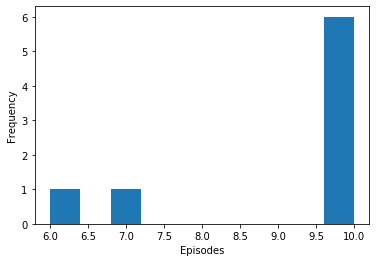

In [19]:
plt.hist(data.Episodes,bins=10)
plt.xlabel('Episodes')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Episodes')

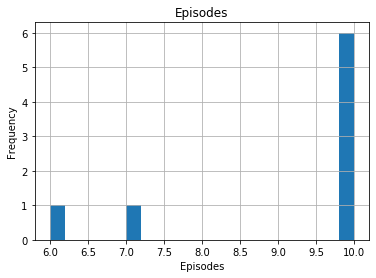

In [20]:
data.Episodes.hist(bins=20)
plt.xlabel('Episodes')
plt.ylabel('Frequency')
plt.title('Episodes')

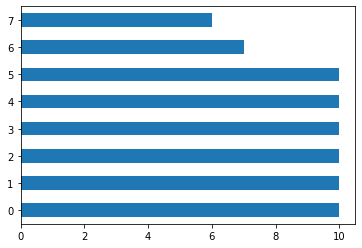

In [21]:
data.Episodes.plot(kind='barh')

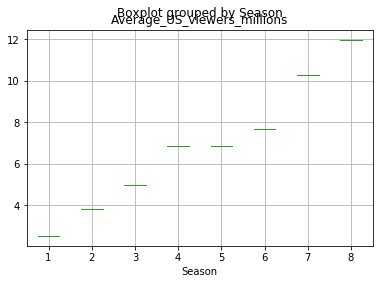

In [22]:
data.boxplot(column='Average_US_viewers_millions', by='Season')

Text(0.5, 1.0, 'Popularity by Season')

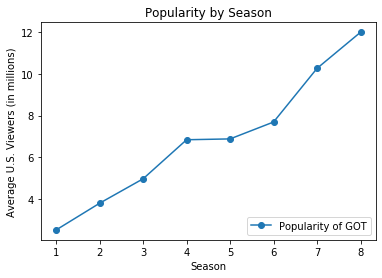

In [23]:
plt.plot(data.Season,data.Average_US_viewers_millions,'o-',label='Popularity of GOT')
plt.ylabel('Average U.S. Viewers (in millions)')
plt.xlabel('Season')
plt.legend(loc = 'lower right')
plt.title('Popularity by Season')

Text(0.5, 1.0, 'Popularity by Year')

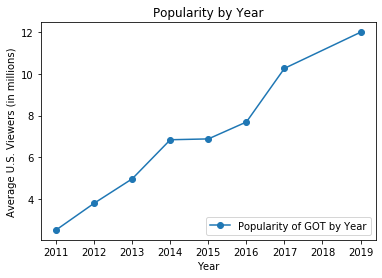

In [24]:
plt.plot(data.First_Aired_Year,data.Average_US_viewers_millions,'o-',label='Popularity of GOT by Year')
plt.xlabel('Year')
plt.ylabel('Average U.S. Viewers (in millions)')
plt.legend(loc = 'lower right')
plt.title('Popularity by Year')

Text(0.5, 1.0, 'Popularity by Season')

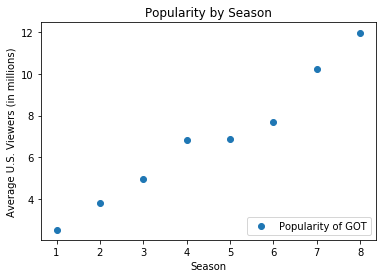

In [25]:
plt.scatter(data.Season,data.Average_US_viewers_millions,label='Popularity of GOT')
plt.ylabel('Average U.S. Viewers (in millions)')
plt.xlabel('Season')
plt.legend(loc = 'lower right')
plt.title('Popularity by Season')